# 인공신경망이란
- 생물학의 신경망에서 영감을 얻은 학습 알고리즘
- 가장 기본적인 인공신경망은 확률적 경사하강법을 사용하는 로지스틱회귀와 동일
- 확률적 경사하강법을 이용하기 때문에 '정규화'가 필요
- input layer(입력층), hidden layer(은닉층), output layer(출력층)으로 이루어져있다

## 모델 만들기
- tensorflow 의 keras를 사용한다


- 딥러닝 모델은 교차검정을 하지않고 검증데이터를 별도로 분리
    - 딥러닝 분야는 데이터셋이 충분히 큼
    - 교차검증의 시간이 너무 오래걸림

```
# 모델생성#

import tensorflow as tf
from tensorflow import keras

- 노드로 이루어진 층 만들기
dense = keras.layers.Dense(출력되는 뉴런의 개수, activation = '뉴런에 적용할 활성화함수', input_shape=(입력값의 shape))

- dense로 이루어진 모델 만들기
model = keras.Sequential(dense)
```

```
* model.summary()
- 각 층에서 만들어지는 파라미터의 개수
- output의 shape을 확인 할 수 있다
```

### 활성화 함수를 사용하는 이유 
- 모델의 복잡도를 증가시키기 위함
- 선형적인 계산을 비선형적으로 만들어주기 위함

### 활성화 함수의 종류 

##### 1. 시그모이드
-함수로 입력되는 모든 값을 0 ~ 1 의 값으로 변경함
출력층의 값이 이진분류일 때 사용됨
-기울기 소실의 문제가 발생
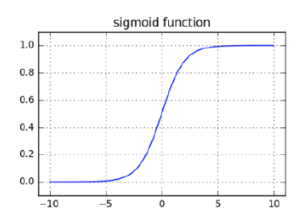


##### 2. 하이퍼볼릭 탄젠트 
-시그모이드의 중심을 0으로 이동시킨 함수
-결과값이 -1~1의 값
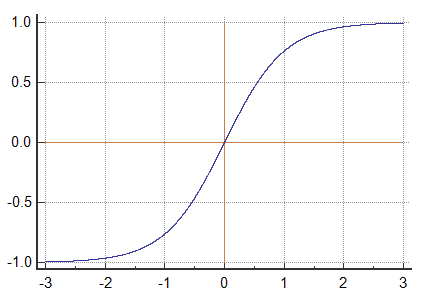


##### 3. ReLU
-현재 가장 많이 사용하는 함수
-0이하는 0의 값, 0이상은 입력값을 그대로 출력(y=x)
-시그모이드의 문제를 해결
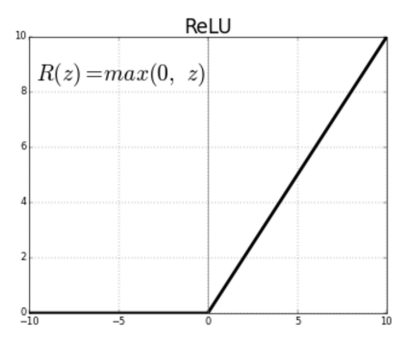


##### 4. LeakyReLU
-ReLU가 죽는 현상을 보안한 함수
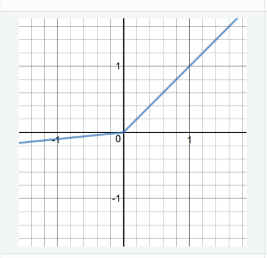


##### 5. softmax
-다중분류의 경우에 사용
-각 클레스에 속 할 확률을 구함
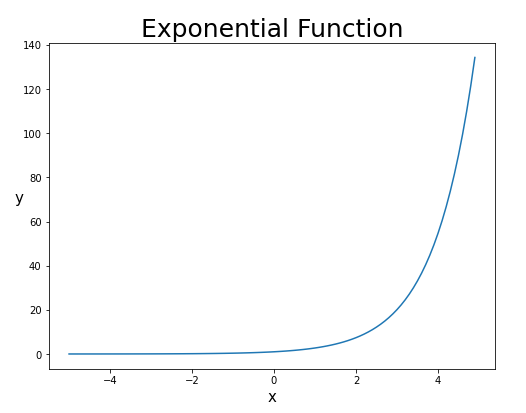



##### 출력층의 활성화 함수
- 이진분류 : 시그모이드
- 다중분류 : 소프트 맥스

## 모델에 조건 추가하기

### 옵티마이저
- 손실함수를 최솟값으로 하는 최적화를 수행하는 알고리즘
- 경사하강법을 사용한다

- complie의 기본적으로 RMSProp을 사용한다

#### 옵티마이저 종류

1. SGD(확률적 경사하강법)
-데이터를 랜덤하게 추출해 그래디언트를 구해 경사하강법을 수행

2. Momentum
-SGD에 속도개념을 적용, 기울기가 줄어도 누적된 기울기값으로 빠르게 최적점에 수렴

3. AdaGrad 
-기울기가 큰 부분에서는 크게 학습 -> 최적점에 가까워질수록 학습률 줄임

4. Adam
-모멘텀+AdaGrad , 전체적경향은 모멘텀, Adagrad로 갱신강도 조정

5. RMSProp
-기울기를 누적하지않고 새로운 기울기의 정보만 반영
-학습률이 크게 떨어져 0에 가까워지는것을 방지(AdaGrad보안)

#### 옵티마이저 설정하기
1. defualt로 설정된 옵티마이저 사용하기
    - 그대로 입력 (complie(optimizer = 'sgd')
2. 하이퍼 파라미터를 변경한 옵티마이저 사용하기
    - 변수로 받아서 입력 (SGD = keras.optimizers.SGD(learning_rate=0.01) -> model.compile(optimizer=SGD)

### 손실함수
예측한 값과 실제 정답의 차이를 비교하기 위한 함수


- 이항 교차 엔트로피(이진분류) : binary_crossentropy
- 범주형 교차 엔트로피(다항분류) : sparse_categorical_crossentropy || categorical_crossentropy
    -  sparse_categorical_crossentropy : 레이블 인코딩 형식
    - categorical_crossentropy : 원핫인코딩 형식
    

- 회귀 : mean_squared_error 

```
#모델에 조건 추가#

model.compile(optimizer = 옵티마이저,loss='손실함수', metic='평가지표')
```

## 모델 학습
- epchos : 훈련데이터를 몇번 순환시켜 훈련할지를 결정
- batch_size : 데이터 셋을 여러 작은 그룹을 나누었을 때 하나의 소그룹에 속하는 데이터 수

-  iteration : 1epoch를 마치는데 필요한 미니배치 갯수


```
#모델 학습하기#
model.fit(x, y, batch_size = , epochs = )
```

## 성능 검증하기 
- 학습 전 train 데이터에서 약 20% 정도의 검증데이터를 분리시킨다
- 검증데이터도 정규화를 실시해주어야한다 (이때 변환기를 fit으로 훈련시키지 않고 바로 transform실시)
- 검증데이터를 이용해 검증 실시

```
# 성능 검증하기 #
model.evaluate(val_sacled_X, val_y)
```

### 과대적합 방지하기
- epchos의 수가 커질수록 모델은 train데이터에 대해만 완벽히 학습하게 되고 과대적합되어 실제 성능은 떨어지게됨

#### 1. 검증손실을 최적의 epchos값 구하기
- 학습과정에 검증과정을 추가해서 검증데이터를 사용했을때의 정확성을 확인한다
- 검증데이터의 정확성점수를 이용해 그래프를 그려 최적의 epchos를 찾는다

```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))
```
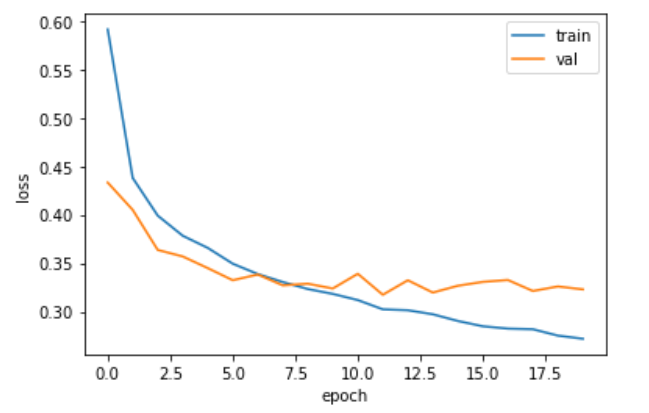

#### 2. 드롭아웃
- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 선정, 선정된 뉴런의 출력을 0으로 설정
- 이런 현상을 통해 특정 뉴런에 과대하게 의존하는 현상을 줄임
- 몇퍼센트의 뉴런의 출력을 0으로 할지를 설정해줌

```
model = model_fn(keras.layers.Dropout(0.3))
```

#### 3. 콜백
1) ModelCheckpoint
- 최상의 검증점수를 만드는 모델을 저장함
- ModelCheckpoint를 이용해 저장되는 모델의 이름을 설정('best-model.h5')
- 최적의 모델이 나와도 훈련은 끝까지 실시


2) EarlyStopping
- 과대적합이 시작되기 전에 훈련을 미리 중지시켜준다
- patience : 검증의 성능이 몇번 떨어지면 중지시킬것인지 설정
- restore_best_weights = True : 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림

```
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, 
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])
```

## 모델 저장하기 & 불러오기

### 1. 저장하기
1) 모델의 가중치만 저장 
- model.weights로 모델의 가중치를 확인할 수 있음
- 저장 : model.save_weights('model-weights.h5')

2) 모델 전체 저장 
- model.save('model-whole.h5')



### 2. 불러오기
1) 모델의 가중치만 불러오기
- 가중치를 불러와 적용 할 모델은 가중치를 생성했던 모델과 완벽히 같은 구조를 가져야 한다
- model.load_weights('model-weights.h5')

2) 모델 전체 불러오기
- model = keras.models.load_model('model-whole.h5')